In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/mestrado/dissertacao/dados/tabelas/resultados/toa_s2_psd_v3.csv', sep=',')

In [4]:
df

,id,S2_B2_1,S2_B3_1,S2_B4_1,S2_B5_1,B2_8A_1,PSD_2,PSD_4,PSD_6,PSD_7,PSD_8,S2_B121
0,0,2008,1911,1791,1671,1376,4386,3540,2647,2067,822,1153
1,1,2027,1916,1820,1698,1312,4514,3723,2851,2323,940,1078
2,2,1939,1826,1714,1624,1293,4498,3623,2705,2159,917,1067
3,3,1979,1838,1653,1579,1342,4432,3418,2299,1832,942,1102
4,4,1926,1806,1677,1570,1349,4367,3489,2558,2059,1050,1055
...,...,...,...,...,...,...,...,...,...,...,...,...
9975,9995,2011,1887,1778,1646,1350,4475,3562,2697,2079,898,1107
9976,9996,1969,1834,1684,1583,1309,4459,3527,2510,1918,827,1092
9977,9997,1973,1865,1787,1666,1290,4474,3620,2803,2208,864,1075
9978,9998,2000,1931,1842,1731,1354,4478,3760,2902,2378,1002,1102


In [5]:
#coeficientes de conversão DN para reflectância
b2_coef = 2.0913869951929513e-05
b4_coef = 2.2682716324961055e-05
b6_coef = 2.7301780701448352e-05
b7_coef = 2.9187292055696335e-05
b8_coef = 4.321185413543993e-05
s2_coef = 10000

In [6]:
### PLANET SUPERDOVE ###
#DN para reflectance PSD
df['PSD_2'] = df['PSD_2'] * b2_coef #B
df['PSD_4'] = df['PSD_4'] * b4_coef #GII
df['PSD_6'] = df['PSD_6'] * b6_coef #R
df['PSD_7'] = df['PSD_7'] * b7_coef #RE
df['PSD_8'] = df['PSD_8'] * b8_coef #NIR

#divisoes bandas PSD
df['B_G_psd'] = df['PSD_2'] / df['PSD_4'] #azul/verde psd
df['B_R_psd'] = df['PSD_2'] / df['PSD_6']  #azul/vermelho psd
df['B_RE_psd'] = df['PSD_2'] / df['PSD_7'] #azul/RE psd
df['B_NIR_psd'] = df['PSD_2'] / df['PSD_8'] #azul/NIR psd
df['G_R_psd'] = df['PSD_4'] / df['PSD_6'] #verde/vermelho psd
df['G_RE_psd'] = df['PSD_4'] / df['PSD_7'] #verde/RE psd
df['G_NIR_psd'] = df['PSD_4'] / df['PSD_8'] #verde/nir psd
df['R_RE_psd'] = df['PSD_6'] / df['PSD_7'] #vermelho/RE psd
df['R_NIR_psd'] = df['PSD_6'] / df['PSD_8'] #vermelho/nir psd
df['RE_NIR_psd'] = df['PSD_7'] / df['PSD_8'] #RE/vermelho psd
#índices psd
df['NDCI_psd'] = (df['PSD_7'] - df['PSD_6']) / (df['PSD_7'] + df['PSD_6']) # (RE-R)/(RE+R) NDCI psd
df['RBD_psd'] = df['PSD_7'] - df['PSD_6'] #RBD = RE − R psd
df['RBR2_psd'] = (df['PSD_6']**-1) * df['PSD_7'] #RBR2 = (R−**1) * RE psd
df['RBR3_psd'] = ((df['PSD_6']**-1) - (df['PSD_7']**-1)) * df['PSD_8'] #RBR3 = ((R**−1) − (RE**−1)) * NIR psd


### SENTINEL ####
#DN para reflectance S2
df['S2_B121'] = df['S2_B121'] / s2_coef #SWIR

df['S2_B2_1'] = (df['S2_B2_1'] - 1000) / s2_coef #B
df['S2_B3_1'] = (df['S2_B3_1'] - 1000)  / s2_coef #G
df['S2_B4_1'] = (df['S2_B4_1'] - 1000) / s2_coef  #R
df['S2_B5_1'] = (df['S2_B5_1'] - 1000) / s2_coef #RE
df['B2_8A_1'] = (df['B2_8A_1'] - 1000) / s2_coef #NIR


#divisoes de bandas S2
df['B_G_s2'] = df['S2_B2_1'] / df['S2_B3_1'] #azul/verde s2
df['B_R_s2'] = df['S2_B2_1'] / df['S2_B4_1']  #azul/vermelho s2
df['B_RE_s2'] = df['S2_B2_1'] / df['S2_B5_1'] #azul/RE s2
df['B_NIR_s2'] = df['S2_B2_1'] / df['B2_8A_1'] #azul/NIR s2
df['G_R_s2'] = df['S2_B3_1'] / df['S2_B4_1'] #verde/vermelho s2
df['G_RE_s2'] = df['S2_B3_1'] / df['S2_B5_1'] #verde/RE s2
df['G_NIR_s2'] = df['S2_B3_1'] / df['B2_8A_1'] #verde/vermelho s2
df['R_RE_s2'] = df['S2_B4_1'] / df['S2_B5_1'] #vermelho/RE s2
df['R_NIR_s2'] = df['S2_B5_1'] / df['B2_8A_1'] #verde/vermelho s2
df['RE_NIR_s2'] = df['S2_B5_1'] / df['B2_8A_1'] #verde/vermelho s2
#índices s2
df['NDCI_s2'] = (df['S2_B5_1'] - df['S2_B4_1']) / (df['S2_B5_1'] + df['S2_B4_1']) # (RE-R)/(RE+R) NDCI s2
df['RBD_s2'] = df['S2_B5_1'] - df['S2_B4_1'] #RBD = RE − R s2 s2
df['RBR2_s2'] = (df['S2_B4_1']**-1) * df['S2_B5_1'] #RBR2 = (R**−1) * RE s2
df['RBR3_s2'] = ((df['S2_B4_1']**-1) - (df['S2_B5_1']**-1)) * df['B2_8A_1'] #RBR3 = ((R**−1) − (RE**−1)) * NIR s2

df.rename(columns={'B2_8A_1': 'S2_B8A_1'}, inplace=True)

df

,id,S2_B2_1,S2_B3_1,S2_B4_1,S2_B5_1,S2_B8A_1,PSD_2,PSD_4,PSD_6,PSD_7,...,G_R_s2,G_RE_s2,G_NIR_s2,R_RE_s2,R_NIR_s2,RE_NIR_s2,NDCI_s2,RBD_s2,RBR2_s2,RBR3_s2
0,0,0.1008,0.0911,0.0791,0.0671,0.0376,0.091728,0.080297,0.072268,0.060330,...,1.151707,1.357675,2.422872,1.178838,1.784574,1.784574,-0.082079,-0.0120,0.848293,-0.085010
1,1,0.1027,0.0916,0.0820,0.0698,0.0312,0.094405,0.084448,0.077837,0.067802,...,1.117073,1.312321,2.935897,1.174785,2.237179,2.237179,-0.080369,-0.0122,0.851220,-0.066504
2,2,0.0939,0.0826,0.0714,0.0624,0.0293,0.094071,0.082179,0.073851,0.063015,...,1.156863,1.323718,2.819113,1.144231,2.129693,2.129693,-0.067265,-0.0090,0.873950,-0.059187
3,3,0.0979,0.0838,0.0653,0.0579,0.0342,0.092690,0.077530,0.062767,0.053471,...,1.283308,1.447323,2.450292,1.127807,1.692982,1.692982,-0.060065,-0.0074,0.886677,-0.066937
4,4,0.0926,0.0806,0.0677,0.0570,0.0349,0.091331,0.079140,0.069838,0.060097,...,1.190547,1.414035,2.309456,1.187719,1.633238,1.633238,-0.085806,-0.0107,0.841950,-0.096771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,9995,0.1011,0.0887,0.0778,0.0646,0.0350,0.093590,0.080796,0.073633,0.060680,...,1.140103,1.373065,2.534286,1.204334,1.845714,1.845714,-0.092697,-0.0132,0.830334,-0.091924
9976,9996,0.0969,0.0834,0.0684,0.0583,0.0309,0.093255,0.080002,0.068527,0.055981,...,1.219298,1.430532,2.699029,1.173242,1.886731,1.886731,-0.079716,-0.0101,0.852339,-0.078263
9977,9997,0.0973,0.0865,0.0787,0.0666,0.0290,0.093569,0.082111,0.076527,0.064446,...,1.099111,1.298799,2.982759,1.181682,2.296552,2.296552,-0.083276,-0.0121,0.846252,-0.066948
9978,9998,0.1000,0.0931,0.0842,0.0731,0.0354,0.093652,0.085287,0.079230,0.069407,...,1.105701,1.273598,2.629944,1.151847,2.064972,2.064972,-0.070566,-0.0111,0.868171,-0.063841


In [ ]:
df.to_csv('/content/drive/MyDrive/mestrado/dissertacao/dados/tabelas/resultados/toa_msi_psd.csv', index=False)

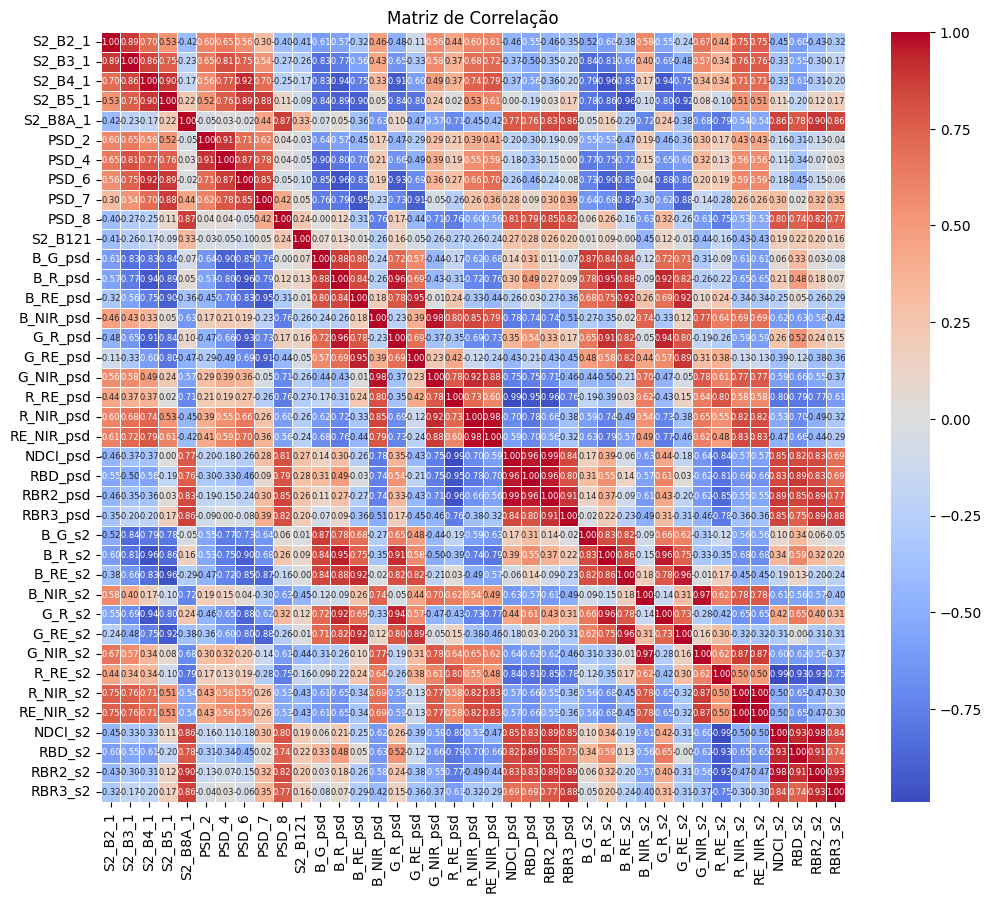

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remover a coluna "id"
df_no_id = df.drop(columns=['id'])

# Calculando a matriz de correlação
correlation_matrix = df_no_id.corr()

# Plotando o heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 6})
plt.title('Matriz de Correlação')
plt.show()

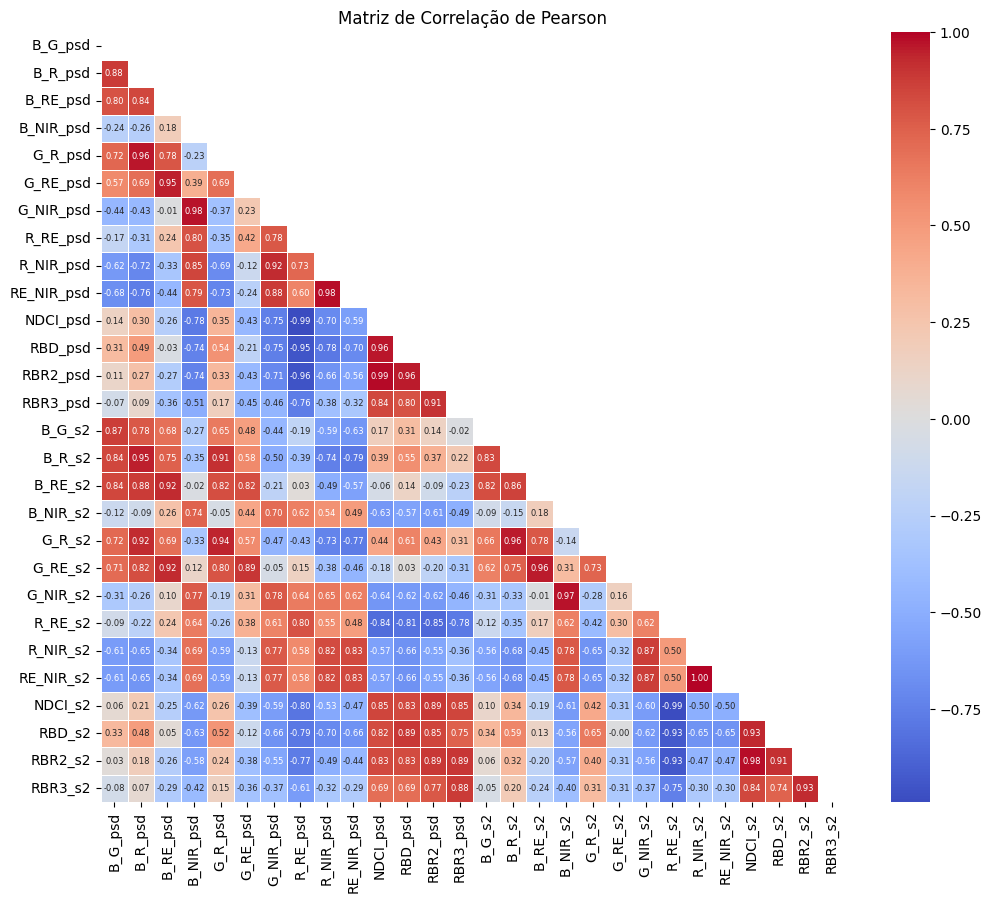

In [ ]:
import numpy as np

# Criando uma máscara para esconder a metade superior da matriz
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


# Remover a coluna "id"
df_matrix = df.drop(columns=['id','PSD_2','PSD_4','PSD_6','PSD_7','PSD_8','S2_B2_1','S2_B3_1', 'S2_B4_1', 'S2_B5_1','S2_B8A_1','S2_B121'])

# Calculando a matriz de correlação
correlation_matrix = df_matrix.corr()


# Plotando o heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 6})
plt.title('Matriz de Correlação de Pearson')
plt.show()


In [ ]:
df.columns

Index(['id', 'S2_B2_1', 'S2_B3_1', 'S2_B4_1', 'S2_B5_1', 'S2_B8A_1', 'PSD_2',
       'PSD_4', 'PSD_6', 'PSD_7', 'PSD_8', 'B_G_psd', 'B_R_psd', 'B_RE_psd',
       'B_NIR_psd', 'G_R_psd', 'G_RE_psd', 'G_NIR_psd', 'R_RE_psd',
       'R_NIR_psd', 'RE_NIR_psd', 'NDCI_psd', 'RBD_psd', 'RBR2_psd',
       'RBR3_psd', 'B_G_s2', 'B_R_s2', 'B_RE_s2', 'B_NIR_s2', 'G_R_s2',
       'G_RE_s2', 'G_NIR_s2', 'R_RE_s2', 'R_NIR_s2', 'RE_NIR_s2', 'NDCI_s2',
       'RBD_s2', 'RBR2_s2', 'RBR3_s2'],
      dtype='object')

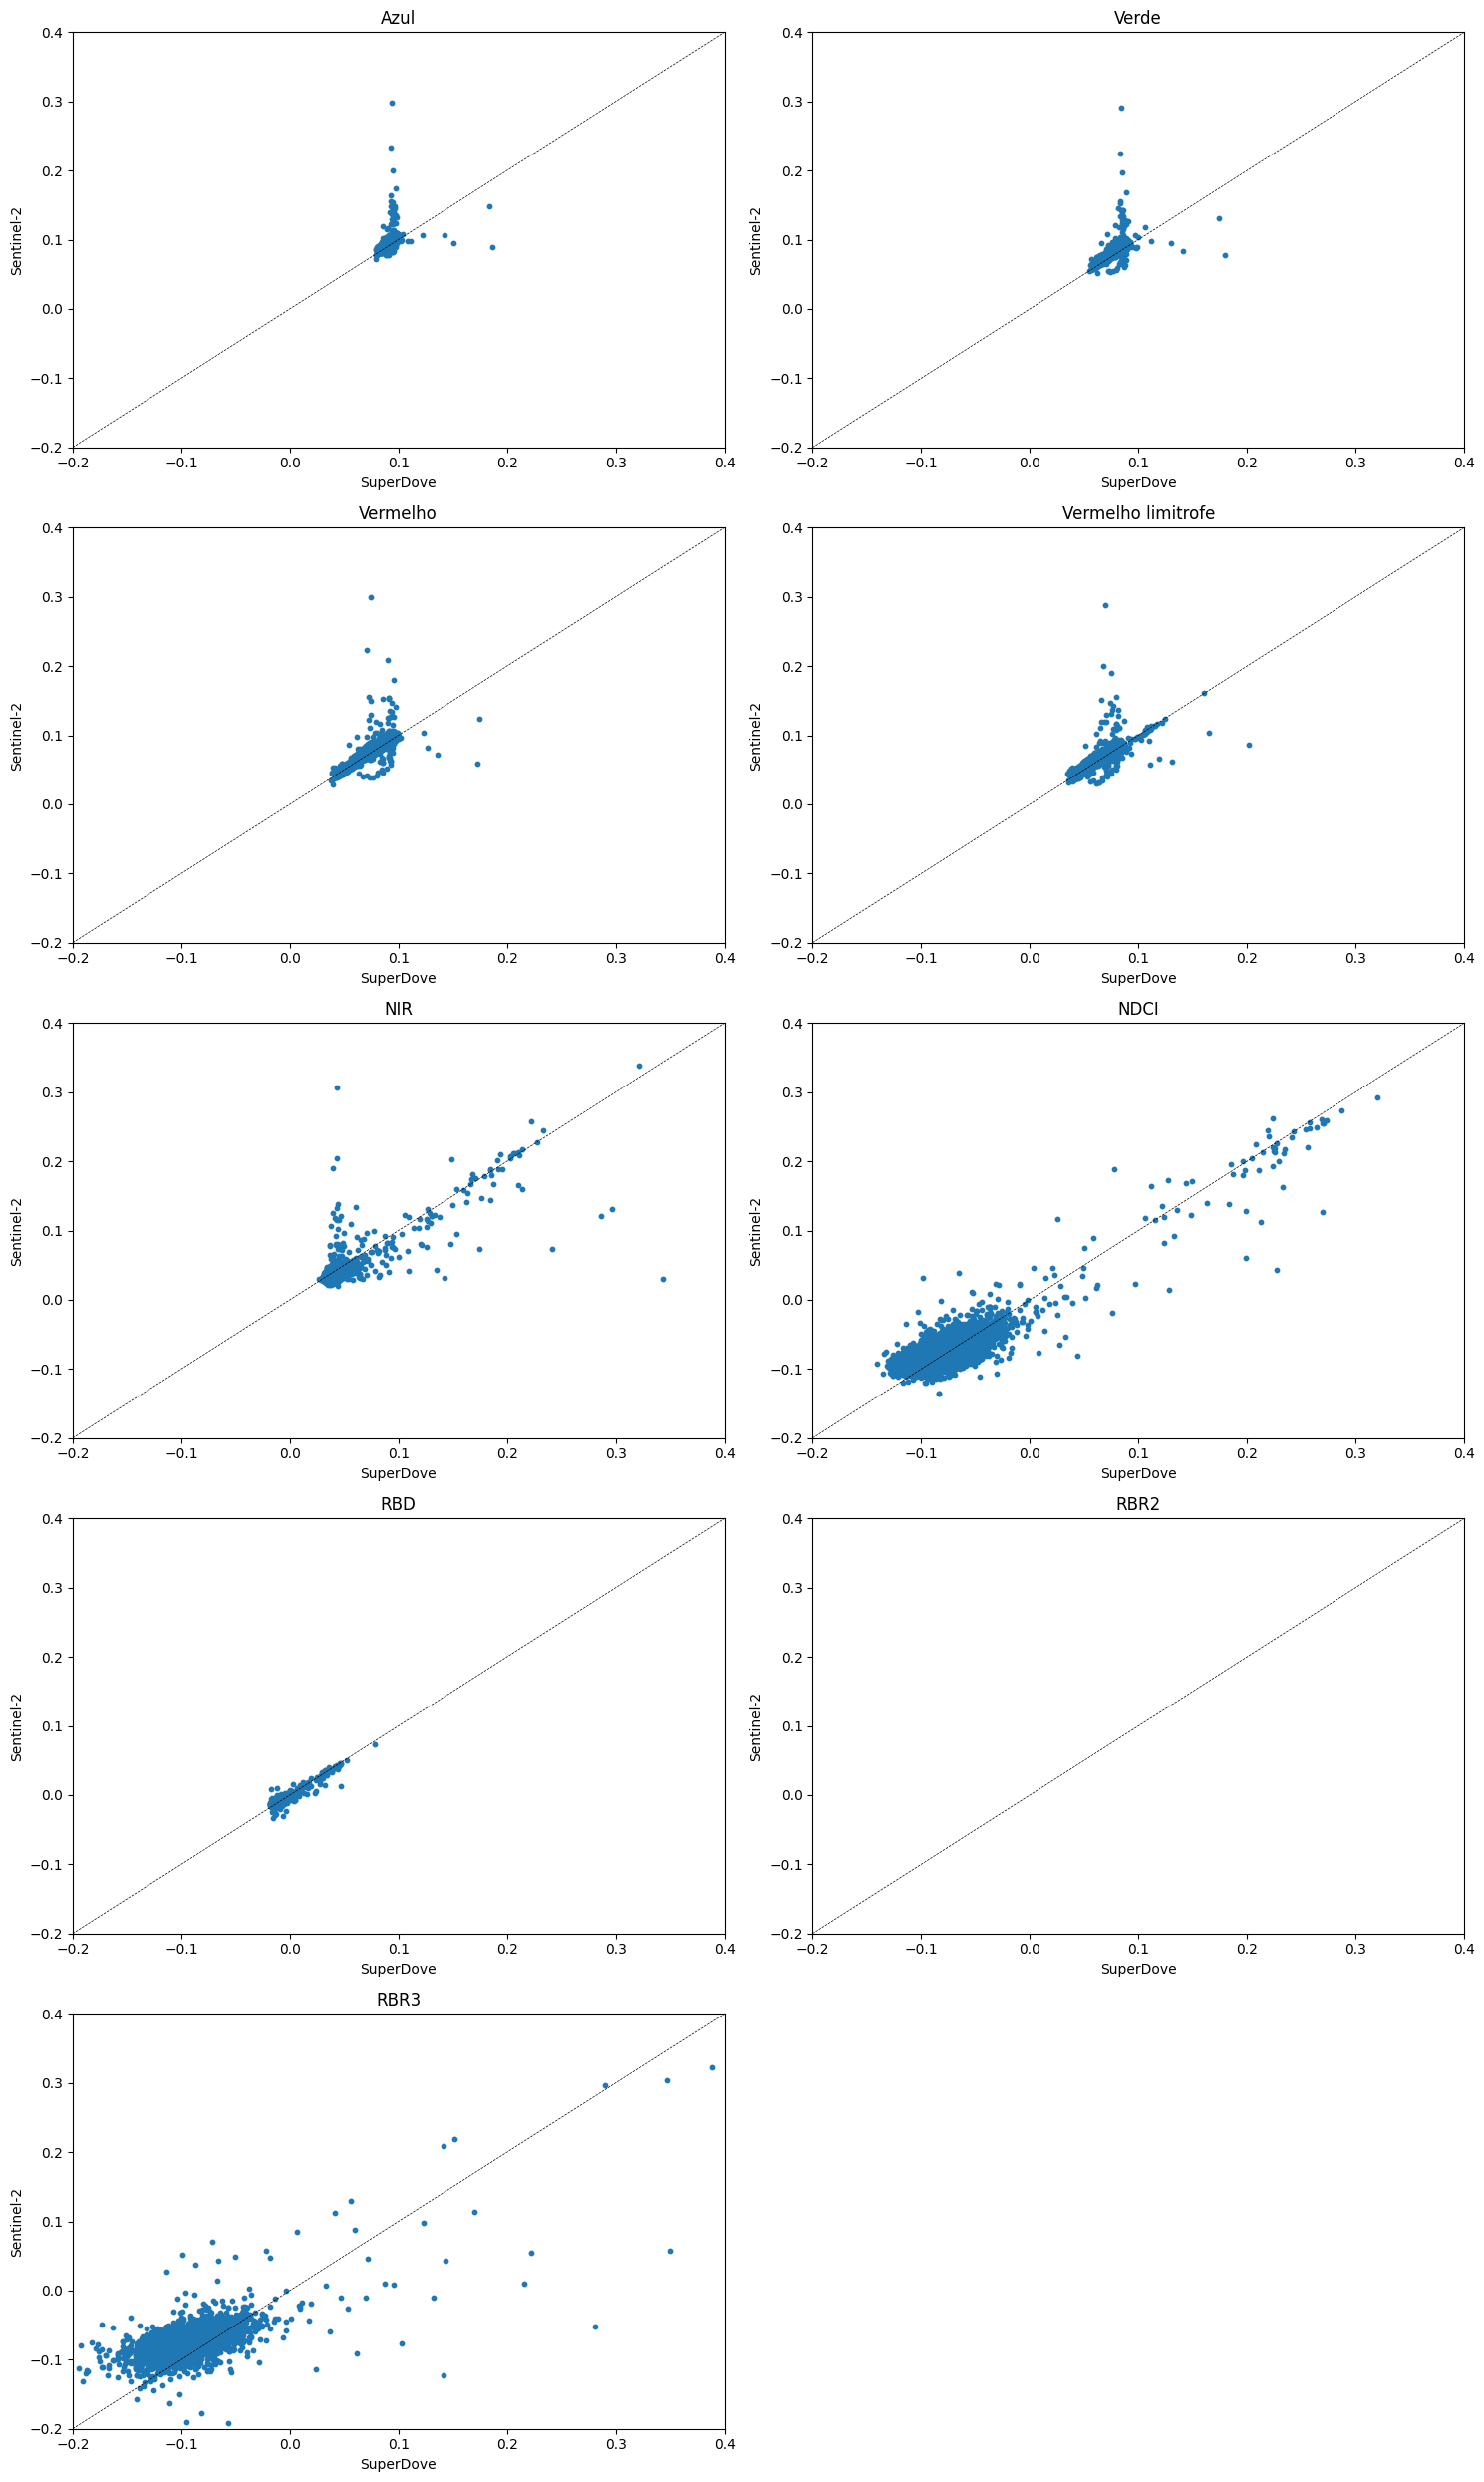

In [ ]:
import matplotlib.pyplot as plt

# Define os dados para os gráficos
data = {
    'Azul': ('PSD_2', 'S2_B2_1'),
    'Verde': ('PSD_4', 'S2_B3_1'),
    'Vermelho': ('PSD_6', 'S2_B4_1'),
    'Vermelho limitrofe': ('PSD_7', 'S2_B5_1'),
    'NIR': ('PSD_8', 'S2_B8A_1'),
    'NDCI': ('NDCI_psd', 'NDCI_s2'),
    'RBD': ('RBD_psd', 'RBD_s2'),
    'RBR2': ('RBR2_psd', 'RBR2_s2'),
    'RBR3': ('RBR3_psd', 'RBR3_s2'),
}

# Configura a figura e os eixos dinamicamente
num_plots = len(data)
num_cols = 2
num_rows = -(-num_plots // num_cols)  # Arredondamento para cima da divisão

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Plota cada gráfico
for (title, (x_col, y_col)), ax in zip(data.items(), axs.flatten()):
    ax.scatter(df[x_col], df[y_col], s=10)
    ax.plot([-0.2, 1], [-0.2, 1], color='black', linestyle='--', linewidth=0.5)  # Linha diagonal
    ax.set_xlabel('SuperDove')
    ax.set_ylabel('Sentinel-2')
    ax.set_title(title)
    ax.set_xlim(-0.2, 0.4)
    ax.set_ylim(-0.2, 0.4)

# Remove subplots não utilizados
for ax in axs.flatten()[len(data):]:
    ax.remove()

plt.tight_layout()  # Ajusta o layout para evitar sobreposições
plt.show()


In [ ]:
def calculate_error_percentage(field_data, satellite_data):
    # Avoid division by zero and handle negative values appropriately
    mask = (satellite_data != 0) & (field_data != 0)  # Avoid division by zero
    est = field_data[mask]
    med = satellite_data[mask]

    # Calculate the median of the relative differences
    relative_diff = np.abs(est / med - 1)  # Relative difference between est and med
    median_relative_diff = np.median(relative_diff)

    # Convert the median relative difference to a percentage scale
    error_percentage = 100 * median_relative_diff

    return error_percentage

e_azul = print('e: ', calculate_error_percentage(df['S2_B2_1'], df['PSD_2']))
e_verde = print('e: ', calculate_error_percentage(df['S2_B3_1'], df['PSD_4']))
e_vermelho = print('e: ', calculate_error_percentage(df['S2_B4_1'], df['PSD_6']))
e_re = print('e: ', calculate_error_percentage(df['S2_B5_1'], df['PSD_7']))
e_nir = print('e: ', calculate_error_percentage(df['S2_B8A_1'], df['PSD_8']))



def bias(estimated_values, measured_values):
  """
  Calculates the bias between two sets of values.

  Args:
    estimated_values: A list of estimated values.
    measured_values: A list of measured values corresponding to the estimated values.

  Returns:
    The bias value.
  """

  if len(estimated_values) != len(measured_values):
    raise ValueError("Lists must have the same number of elements.")

  # Calculate the difference between estimated and measured values
  differences = [est - meas for est, meas in zip(estimated_values, measured_values)]

  # Return the average of the differences
  return sum(differences) / len(differences)

b_azul = print('bias: ', bias(df['S2_B2_1'], df['PSD_2']))
b_verde = print('bias: ', bias(df['S2_B3_1'], df['PSD_4']))
b_vermelho = print('bias: ', bias(df['S2_B4_1'], df['PSD_6']))
b_re = print('bias: ', bias(df['S2_B5_1'], df['PSD_7']))
b_nir = print('bias: ', bias(df['S2_B8A_1'], df['PSD_8']))



def RMSE(valores_previstos, valores_reais):
  """
  Calcula o erro quadrático médio (RMSE) entre dois conjuntos de valores.

  Args:
    valores_previstos: Lista de valores previstos.
    valores_reais: Lista de valores reais.

  Returns:
    Valor do RMSE.
  """

  if len(valores_previstos) != len(valores_reais):
    raise ValueError("Os conjuntos de valores devem ter o mesmo tamanho.")

  diferencas_quadradas = [(estimado - real)**2 for estimado, real in zip(valores_previstos, valores_reais)]
  rmse = np.sqrt(sum(diferencas_quadradas) / len(diferencas_quadradas))

  return rmse

rmse_azul = print('rmse: ', RMSE(df['S2_B2_1'], df['PSD_2']))
rmse_verde = print('rmse: ', RMSE(df['S2_B3_1'], df['PSD_4']))
rmse_vermelho = print('rmse: ', RMSE(df['S2_B4_1'], df['PSD_6']))
rmse_re = print('rmse: ', RMSE(df['S2_B5_1'], df['PSD_7']))
rmse_nir = print('rmse: ', RMSE(df['S2_B8A_1'], df['PSD_8']))


def MAPE(valores_previstos, valores_reais):
  """
  Calcula o erro médio percentual absoluto (MAPE) entre dois conjuntos de valores.

  Args:
    valores_previstos: Lista de valores previstos.
    valores_reais: Lista de valores reais.

  Returns:
    Valor do MAPE.
  """

  if len(valores_previstos) != len(valores_reais):
    raise ValueError("Os conjuntos de valores devem ter o mesmo tamanho.")

  diferencas = [abs(estimado - real) / real for estimado, real in zip(valores_previstos, valores_reais)]
  mape = 100 * sum(diferencas) / len(diferencas)

  return mape

mape_azul = print('mape: ', MAPE(df['S2_B2_1'], df['PSD_2']))
mape_verde = print('mape: ', MAPE(df['S2_B3_1'], df['PSD_4']))
mape_vermelho = print('mape: ', MAPE(df['S2_B4_1'], df['PSD_6']))
mape_re = print('mape: ', MAPE(df['S2_B5_1'], df['PSD_7']))
mape_nir = print('mape: ', MAPE(df['S2_B8A_1'], df['PSD_8']))

e:  5.2464468018972585
e:  5.300723392680795
e:  9.498134615141861
e:  10.830973481783246
e:  40.518440801589364
bias:  -0.005246751451272635
bias:  -0.004601561672808571
bias:  -0.007440345030808683
bias:  -0.007267843485402121
bias:  -0.01597807530229181
rmse:  0.006118692737083061
rmse:  0.005535818354741773
rmse:  0.008193804626764768
rmse:  0.008101610554864488
rmse:  0.017102750249481973
mape:  5.633135680622764
mape:  5.678159686834832
mape:  10.186856552289651
mape:  11.605685492547142
mape:  39.90370509714671


In [ ]:
### ADAPTACAO DO R - MACIEL###


#error
#  df3$error_ <- abs((df3$measured-df3$est)/df3$measured)*100

def error_calc(est, med):
  mask = (est != 0) & (med != 0)  # Avoid division by zero
  est = est[mask]
  med = med[mask]

  error = abs((med - est) / med) * 100
  mean_error = error.mean()
  return mean_error

e_azul = print('e: ', error_calc(df['S2_B2_1'], df['PSD_2']))


#error2
#E = 100*(10^(median(abs(Y)))-1)
#df3$Y = log10(df3$est/df3$measured)

def error_calc_2(est, med):
  mask = (est != 0) & (med != 0)  # Avoid division by zero
  est = est[mask]
  med = med[mask]

  y = np.log10(est/ med)

  error2 = 100*(10**((abs(y).median()))-1)

  return error2


e2_azul = print('e2: ', error_calc_2(df['S2_B2_1'], df['PSD_2']))



#bias
#  df3$BIAS <- log10(df3$est)-log10(df3$measured)
# summarise(BIAS = 10^mean(BIAS))

def bias_calc(est, med):
    mask = (est != 0) & (med != 0)  # Evitar divisão por zero
    est = est[mask]
    med = med[mask]

    bias = (np.log10(est) - np.log10(med)).mean()

    return 10**(bias)

bias_azul = print('bias: ', bias_calc(df['S2_B2_1'], df['PSD_2']))



#bias2
#  summarise(BIAS2 = 100*sign(median((Y)))*(10^(abs(median(Y)))-1))

def bias_calc_2(est, med):
  mask = (est != 0) & (med != 0)  # Evitar divisão por zero
  est = est[mask]
  med = med[mask]

  y = np.log10(est/ med)

  bias2 = 100 * np.sign(np.median(y)) * (10 ** (np.abs(np.median(y))) - 1)

  return bias2

bias2_azul = print('bias2: ', bias_calc_2(df['S2_B2_1'], df['PSD_2']))


#rmls

def rmsle_calc(est, med):
  mask = (est != 0) & (med != 0)  # Evitar divisão por zero
  est = est[mask]
  med = med[mask]
  rmsle = np.sqrt(np.mean((np.log1p(est) - np.log1p(med))**2))

  return rmsle


rmsle_azul = print('rmsle: ', rmsle_calc(df['S2_B2_1'], df['PSD_2']))


#slope

def slope_calc(est, med):

  mask = (est != 0) & (med != 0)  # Evitar divisão por zero
  est = est[mask]
  med = med[mask]

  slope, _ = np.polyfit(est, med, 1)

  return slope


s_azul = print('s: ', slope_calc(df['S2_B2_1'], df['PSD_2']))



e:  5.633135680622773
e2:  5.53693938117823
bias:  0.9433913671363349
bias2:  -5.534232432458519
rmsle:  0.005605637780808751
s:  0.4592008449685563


In [ ]:
#apenas mae e bias pelo metodo do nincao

def bias_func(predict,observed):
    mask_1 = predict >= 0
    mask_2 = observed >= 0
    mask_3 = mask_1 * mask_2
    a = predict[mask_3]
    b = observed[mask_3]
    return (10 ** (sum(np.log10(a) - np.log10(b)) /len(a)))

def mae_log_func(predict,observed):
    mask_4 = predict >= 0
    mask_5 = observed >= 0
    mask_6 = mask_4 * mask_5
    a = predict[mask_6]
    b = observed[mask_6]
    return (10 ** (sum(abs((np.log10(a) - np.log10(b)))) /len(b)))

mae_azul = print('mae azul: ', mae_log_func(df['S2_B2_1'], df['PSD_2']))
mae_verde = print('mae verde: ', mae_log_func(df['S2_B3_1'], df['PSD_4']))
mae_vermelho = print('mae vermelho: ', mae_log_func(df['S2_B4_1'], df['PSD_6']))
mae_re = print('mae re: ', mae_log_func(df['S2_B5_1'], df['PSD_7']))
mae_nir = print('mae nir: ', mae_log_func(df['S2_B8A_1'], df['PSD_8']))

bias_azul = print('bias azul: ', bias_func(df['S2_B2_1'], df['PSD_2']))
bias_verde = print('bias verde: ', bias_func(df['S2_B3_1'], df['PSD_4']))
bias_vermelho = print('bias vermelho: ', bias_func(df['S2_B4_1'], df['PSD_6']))
bias_re = print('bias re: ', bias_func(df['S2_B5_1'], df['PSD_7']))
bias_nir = print('bias nir: ', bias_func(df['S2_B8A_1'], df['PSD_8']))

mae azul:  2.1224167083839998
mae verde:  2.293270453308351
mae vermelho:  2.387754109639446
mae re:  2.6408643581314726
mae nir:  3.3821739318585666
bias azul:  2.1222728018229255
bias verde:  2.293054792839809
bias vermelho:  2.387344018618472
bias re:  2.640306929559391
bias nir:  3.3795194985427193


In [ ]:
from sklearn.metrics import r2_score


operacoes = ['PSD_2', 'PSD_4', 'PSD_6', 'PSD_7', 'PSD_8',
             'B_G_psd', 'B_R_psd', 'B_RE_psd', 'B_NIR_psd',
             'G_R_psd', 'G_RE_psd', 'G_NIR_psd', 'R_RE_psd',
             'R_NIR_psd', 'RE_NIR_psd', 'NDCI_psd', 'RBD_psd',
             'RBD2_psd', 'RBD3_psd', 'S2_B2_1', 'S2_B3_1',
             'S2_B4_1', 'S2_B5_1', 'B2_8A_1', 'B_G_s2',
             'B_R_s2', 'B_RE_s2', 'B_NIR_s2', 'G_R_s2',
             'G_RE_s2', 'G_NIR_s2', 'R_RE_s2', 'R_NIR_s2',
             'RE_NIR_s2', 'NDCI_s2', 'RBD_s2', 'RBD2_s2',
             'RBD3_s2']



r2_values = {}

# Lista de todas as colunas no DataFrame
colunas = df.columns

# Calculando o R² para cada par de colunas
for coluna1 in colunas:
    for coluna2 in colunas:
        r2_values[(coluna1, coluna2)] = r2_score(df[coluna1], df[coluna2])

print(r2_values)

{('id', 'id'): 1.0, ('id', 'S2_B2_1'): -2.999160994757774, ('id', 'S2_B3_1'): -2.999174253322227, ('id', 'S2_B4_1'): -2.9991859468494875, ('id', 'S2_B5_1'): -2.9991996411450903, ('id', 'B2_8A_1'): -2.9992372048472165, ('id', 'PSD_2'): -2.999287743405518, ('id', 'PSD_4'): -2.999301801496129, ('id', 'PSD_6'): -2.9993102295729317, ('id', 'PSD_7'): -2.9993239751319223, ('id', 'PSD_8'): -2.9993508640023347, ('id', 'B_G_psd'): -2.998026152403094, ('id', 'B_R_psd'): -2.997883154639925, ('id', 'B_RE_psd'): -2.9976082202548624, ('id', 'B_NIR_psd'): -2.996539235869876, ('id', 'G_R_psd'): -2.9980778053607797, ('id', 'G_RE_psd'): -2.9978375547588394, ('id', 'G_NIR_psd'): -2.996896780753524, ('id', 'R_RE_psd'): -2.9979803085300984, ('id', 'R_NIR_psd'): -2.9971106873394984, ('id', 'RE_NIR_psd'): -2.9974749367967024, ('id', 'NDCI_psd'): -2.999499699802132, ('id', 'RBD_psd'): -2.9994138057626714, ('id', 'RBD2_psd'): -2.9983817462803355, ('id', 'RBD3_psd'): -2.999504061029236, ('id', 'B_G_s2'): -2.9981

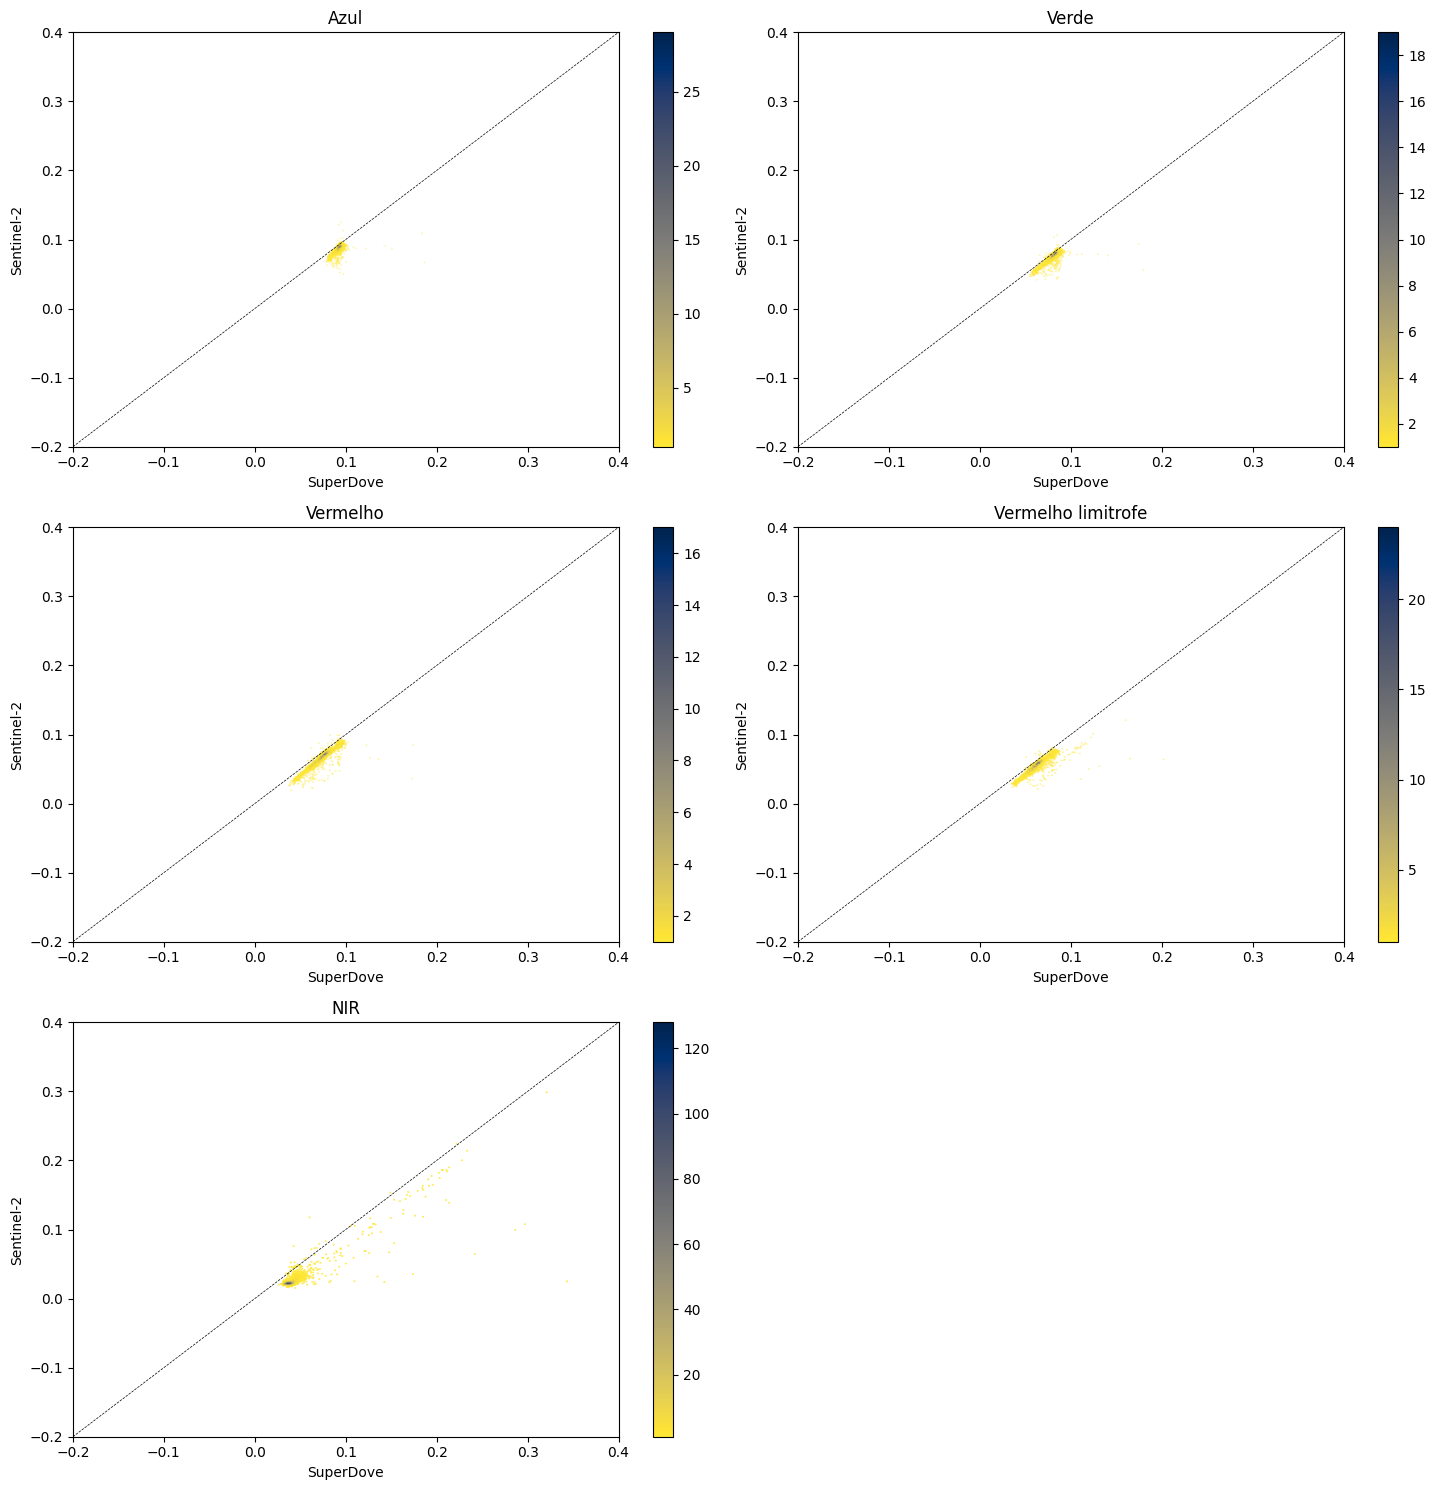

In [ ]:
import matplotlib.pyplot as plt

# Define os dados para os gráficos
data = {
    'Azul': ('PSD_2', 'S2_B2_1'),
    'Verde': ('PSD_4', 'S2_B3_1'),
    'Vermelho': ('PSD_6', 'S2_B4_1'),
    'Vermelho limitrofe': ('PSD_7', 'S2_B5_1'),
    'NIR': ('PSD_8', 'S2_B8A_1')
}

# Configura a figura e os eixos dinamicamente
num_plots = len(data)
num_cols = 2
num_rows = -(-num_plots // num_cols)  # Arredondamento para cima da divisão

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Plota cada gráfico
for (title, (x_col, y_col)), ax in zip(data.items(), axs.flatten()):
    hb = ax.hexbin(df[x_col], df[y_col], gridsize=500, cmap='cividis_r', mincnt=1)
    ax.plot([-0.2, 1], [-0.2, 1], color='black', linestyle='--', linewidth=0.5)
    ax.set_xlabel('SuperDove')
    ax.set_ylabel('Sentinel-2')
    ax.set_title(title)
    ax.set_xlim(-0.2, 0.4)
    ax.set_ylim(-0.2, 0.4)
    plt.colorbar(hb, ax=ax)

# Remove subplots não utilizados
for ax in axs.flatten()[len(data):]:
    ax.remove()

plt.tight_layout()  # Ajusta o layout para evitar sobreposições
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


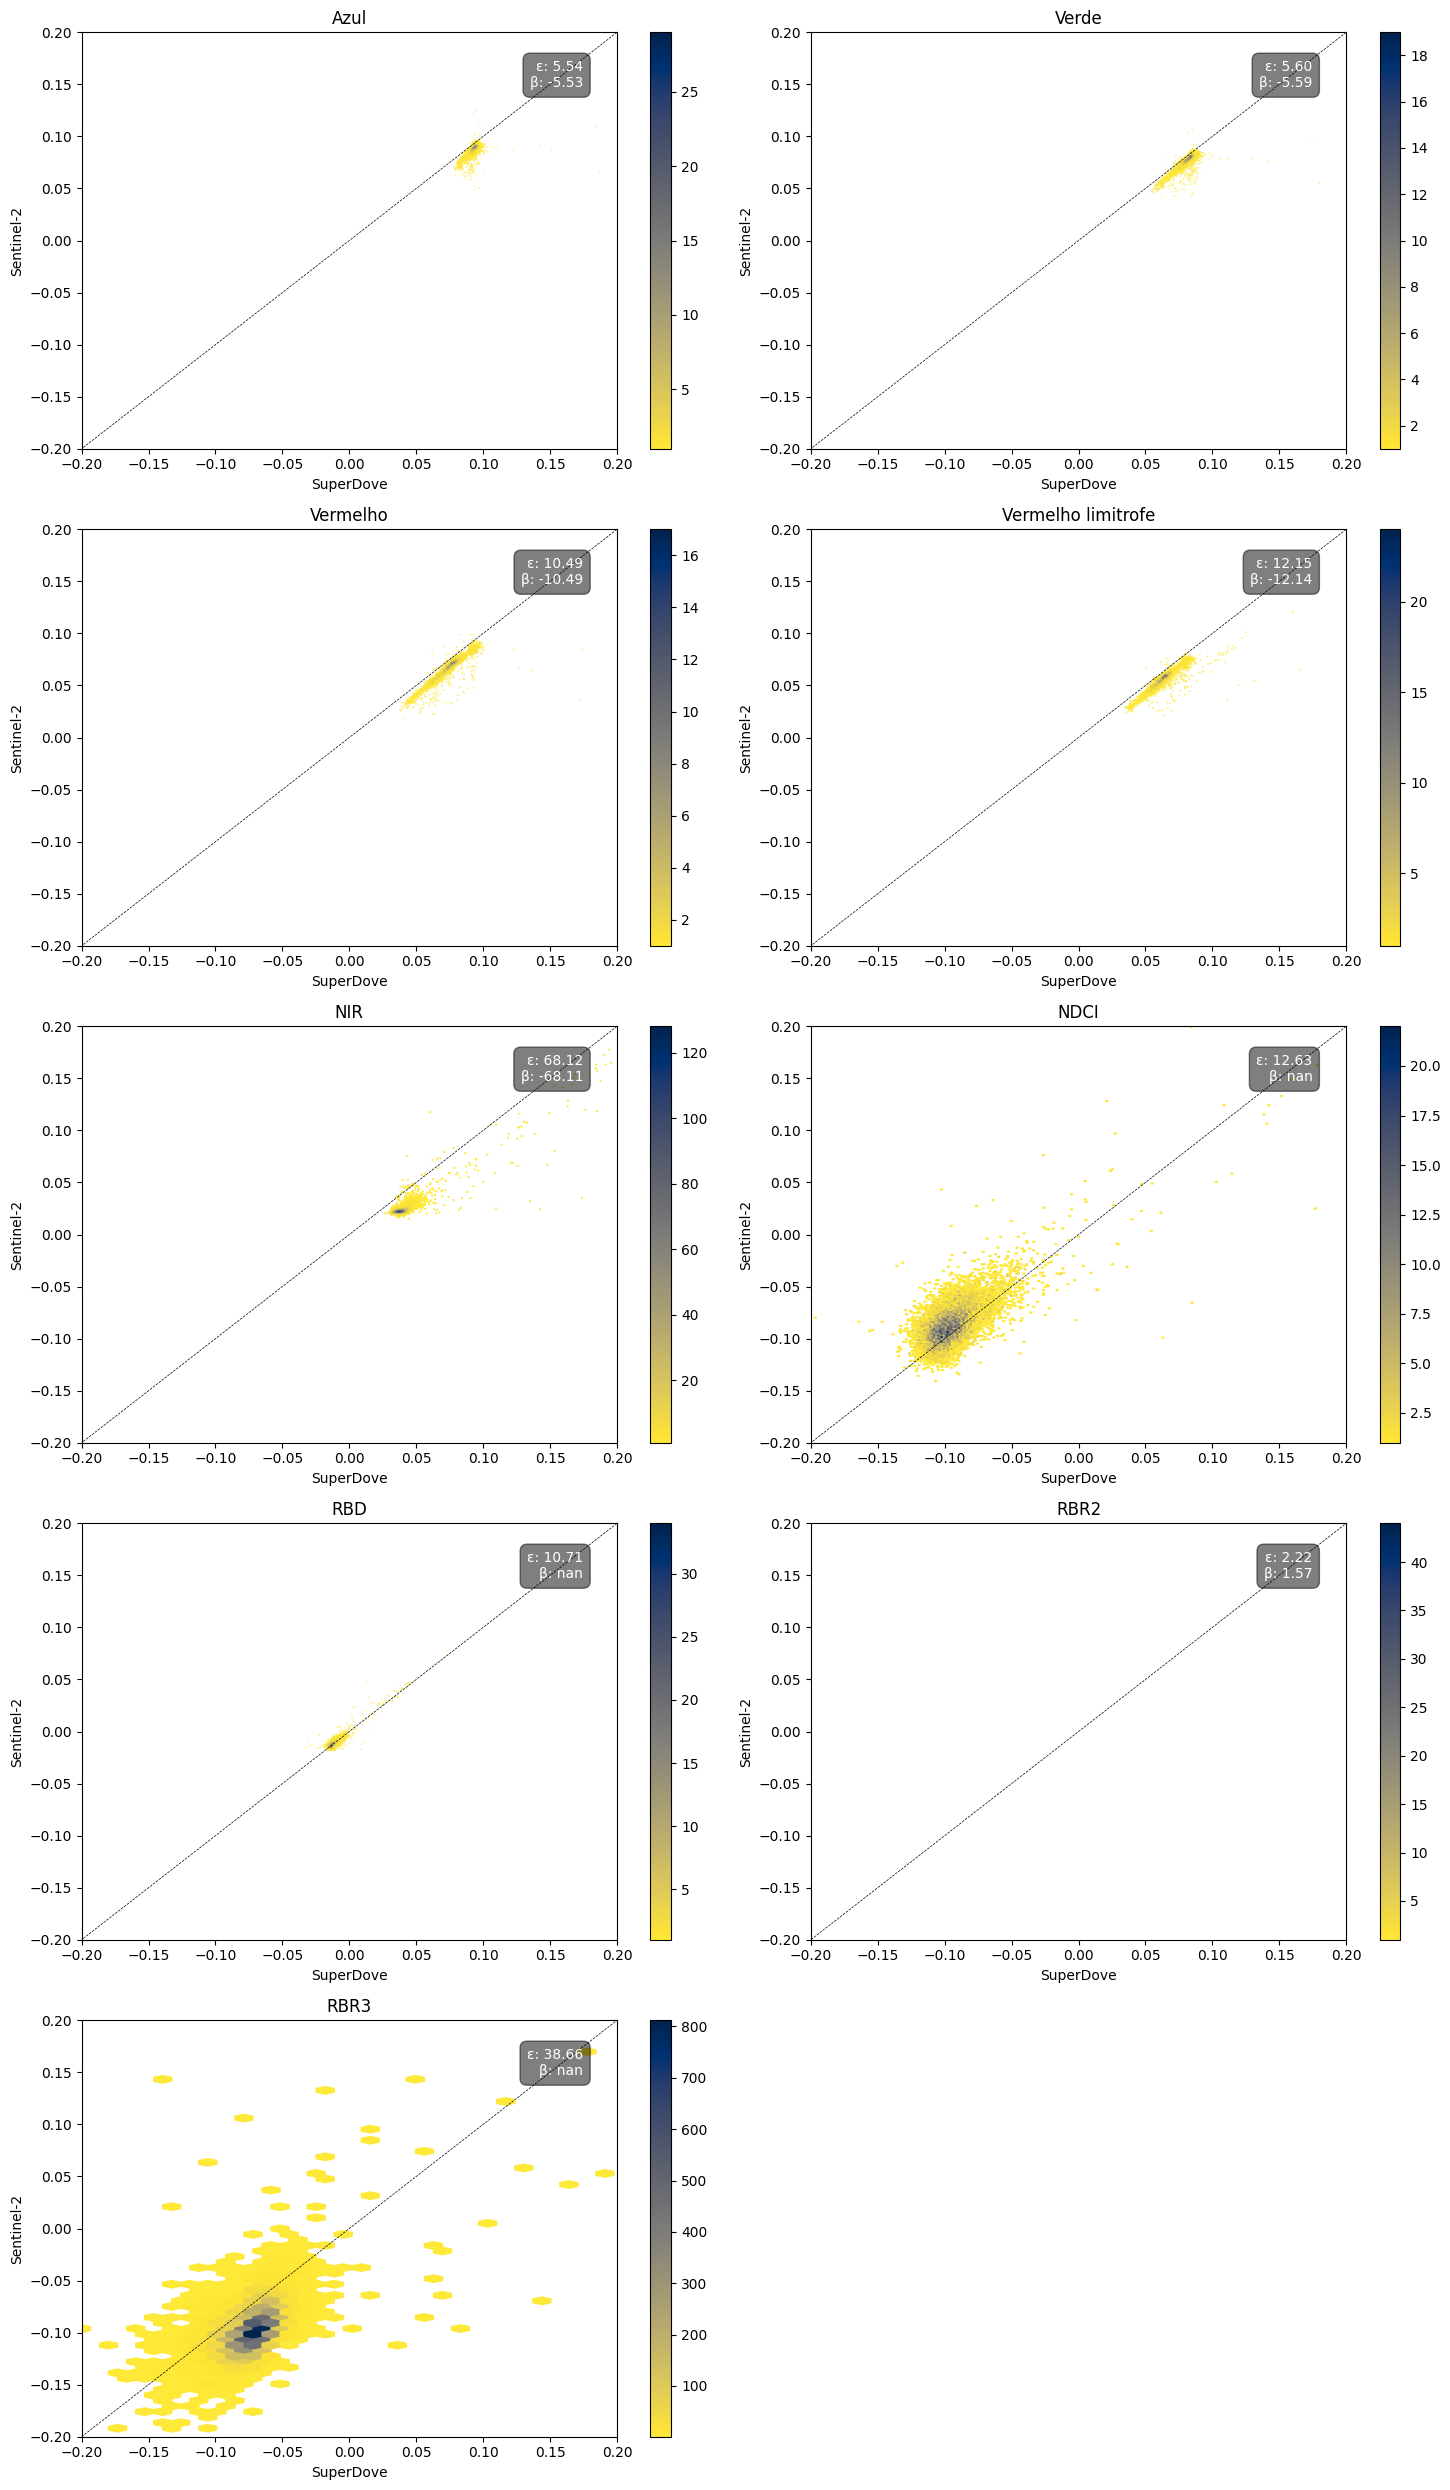

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Defina seus dados ou carregue de um arquivo, assumindo df como DataFrame
# df = pd.read_csv('seu_arquivo.csv') # ou qualquer método de carregamento de dados

# Define os dados para os gráficos
data = {
    'Azul': ('PSD_2', 'S2_B2_1'),
    'Verde': ('PSD_4', 'S2_B3_1'),
    'Vermelho': ('PSD_6', 'S2_B4_1'),
    'Vermelho limitrofe': ('PSD_7', 'S2_B5_1'),
    'NIR': ('PSD_8', 'S2_B8A_1'),
    'NDCI': ('NDCI_s2','NDCI_psd'),
    'RBD': ('RBD_s2', 'RBD_psd'),
    'RBR2': ('RBR2_s2','RBR2_psd'),
    'RBR3': ( 'RBR3_s2', 'RBR3_psd')
}


def error_func(est, med):
  mask = (est != 0) & (med != 0)  # Avoid division by zero
  est = est[mask]
  med = med[mask]

  y = np.log10(est/ med)

  error2 = 100*(10**((abs(y).median()))-1)

  return error2


# Define a função para calcular o viés
def bias_func(est, med):
  mask = (est != 0) & (med != 0)  # Evitar divisão por zero
  est = est[mask]
  med = med[mask]

  y = np.log10(est/ med)

  bias2 = 100 * np.sign(np.median(y)) * (10 ** (np.abs(np.median(y))) - 1)

  return bias2



# Calcula o viés e o MAE para cada par de variáveis
bias_values = {}
error_values = {}
for title, (x_col, y_col) in data.items():
    bias_values[title] = bias_func(df[y_col], df[x_col])
    error_values[title] = error_func(df[y_col], df[x_col])

# Configura a figura e os eixos dinamicamente
num_plots = len(data)
num_cols = 2
num_rows = -(-num_plots // num_cols)  # Arredondamento para cima da divisão

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Plota cada gráfico
for (title, (x_col, y_col)), ax in zip(data.items(), axs.flatten()):
    hb = ax.hexbin(df[x_col], df[y_col], gridsize=500, cmap='cividis_r', mincnt=1)
    ax.plot([-1, 1], [-1, 1], color='black', linestyle='--', linewidth=0.5)
    ax.set_xlabel('SuperDove')
    ax.set_ylabel('Sentinel-2')
    ax.set_title(title)
    ax.set_xlim(-0.2, 0.2)
    ax.set_ylim(-0.2, 0.2)
    plt.colorbar(hb, ax=ax)

    # Adiciona anotações de viés e MAE
    ax.annotate(f'ε: {error_values[title]:.2f}\nβ: {bias_values[title]:.2f}',
                xy=(0.95, 0.95), xycoords='axes fraction',
                xytext=(-5, -5), textcoords='offset points',
                ha='right', va='top', fontsize=10, color='white',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='black', alpha=0.5))

# Remove subplots não utilizados
for ax in axs.flatten()[len(data):]:
    ax.remove()

plt.tight_layout()  # Ajusta o layout para evitar sobreposições
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


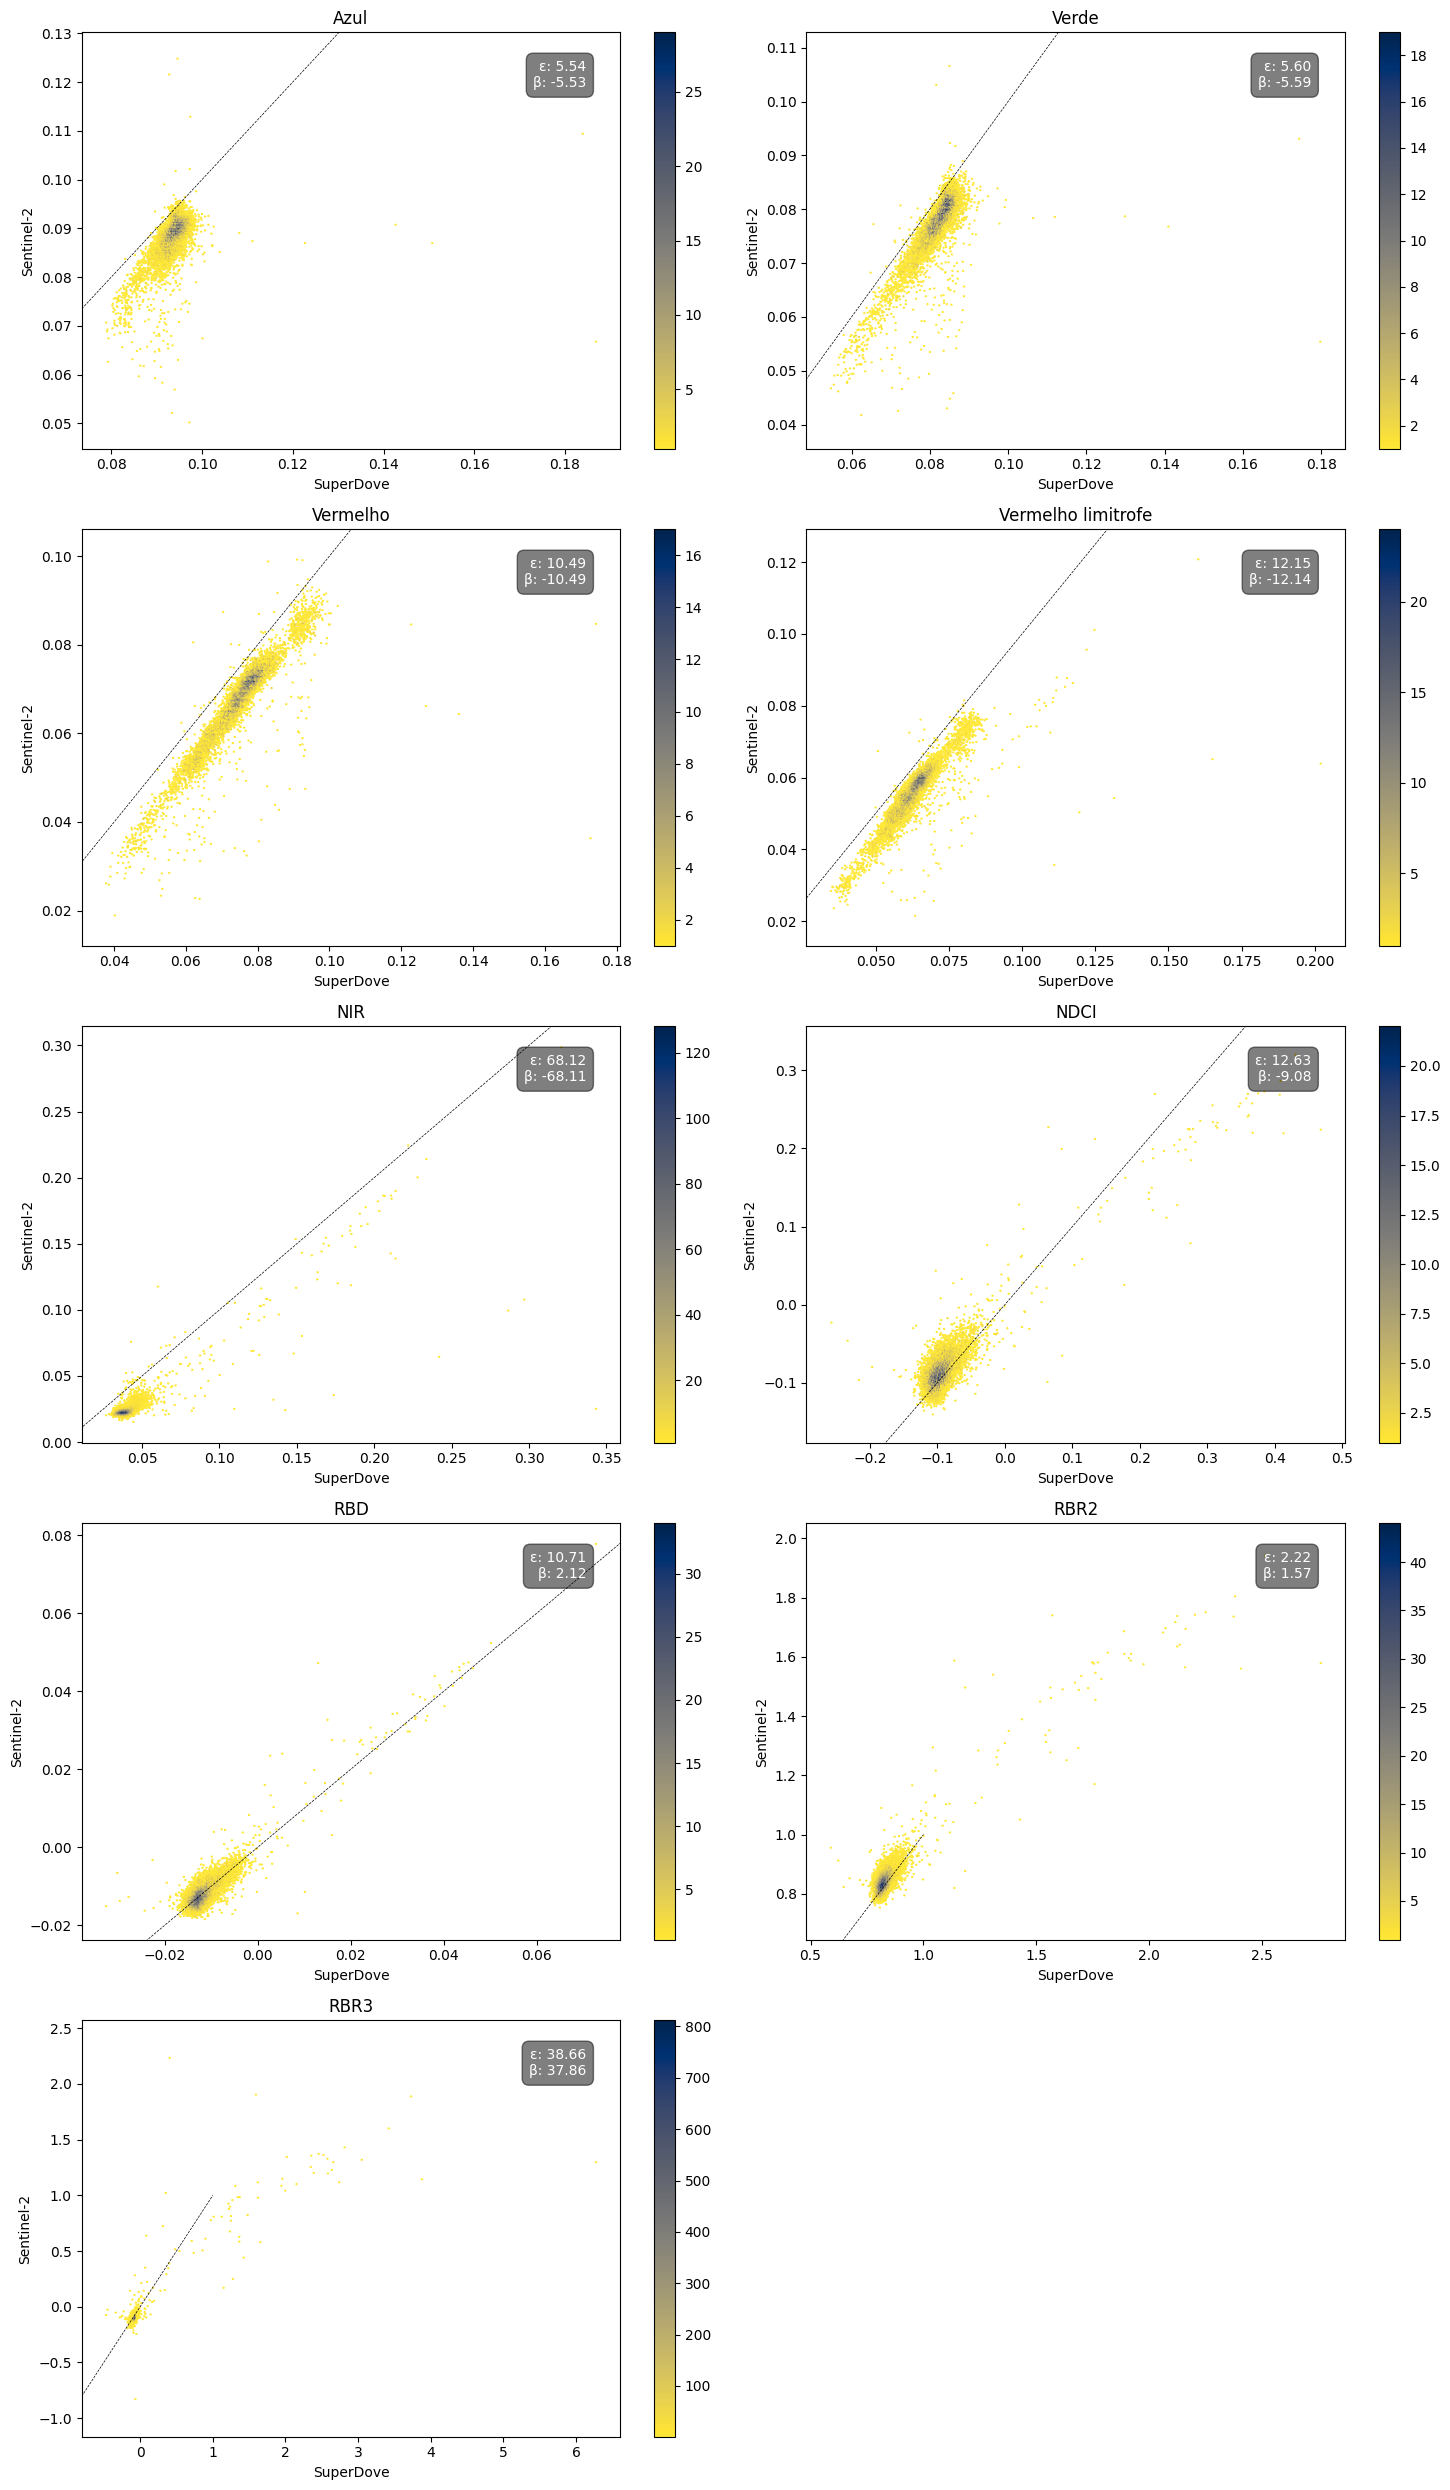

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Defina seus dados ou carregue de um arquivo, assumindo df como DataFrame
# df = pd.read_csv('seu_arquivo.csv') # ou qualquer método de carregamento de dados

# Define os dados para os gráficos
data = {
    'Azul': ('PSD_2', 'S2_B2_1'),
    'Verde': ('PSD_4', 'S2_B3_1'),
    'Vermelho': ('PSD_6', 'S2_B4_1'),
    'Vermelho limitrofe': ('PSD_7', 'S2_B5_1'),
    'NIR': ('PSD_8', 'S2_B8A_1'),
    'NDCI': ('NDCI_s2','NDCI_psd'),
    'RBD': ('RBD_s2', 'RBD_psd'),
    'RBR2': ('RBR2_s2','RBR2_psd'),
    'RBR3': ( 'RBR3_s2', 'RBR3_psd')
}

def error_func(est, med):
    mask = (est != 0) & (med != 0) & (~np.isnan(est)) & (~np.isnan(med))  # Avoid division by zero and NaNs
    est = est[mask]
    med = med[mask]
    if len(est) == 0 or len(med) == 0:  # Check if filtered data is empty
        return np.nan
    y = np.log10(est / med)
    error2 = 100 * (10**(np.nanmedian(np.abs(y))) - 1)
    return error2

def bias_func(est, med):
    mask = (est != 0) & (med != 0) & (~np.isnan(est)) & (~np.isnan(med))  # Avoid division by zero and NaNs
    est = est[mask]
    med = med[mask]
    if len(est) == 0 or len(med) == 0:  # Check if filtered data is empty
        return np.nan
    y = np.log10(est / med)
    bias2 = 100 * np.sign(np.nanmedian(y)) * (10 ** (np.abs(np.nanmedian(y))) - 1)
    return bias2

# Calcula o viés e o MAE para cada par de variáveis
bias_values = {}
error_values = {}
for title, (x_col, y_col) in data.items():
    bias_values[title] = bias_func(df[y_col], df[x_col])
    error_values[title] = error_func(df[y_col], df[x_col])

# Configura a figura e os eixos dinamicamente
num_plots = len(data)
num_cols = 2
num_rows = -(-num_plots // num_cols)  # Arredondamento para cima da divisão

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Plota cada gráfico
for (title, (x_col, y_col)), ax in zip(data.items(), axs.flatten()):
    hb = ax.hexbin(df[x_col], df[y_col], gridsize=500, cmap='cividis_r', mincnt=1)
    ax.plot([-1, 1], [-1, 1], color='black', linestyle='--', linewidth=0.5)
    ax.set_xlabel('SuperDove')
    ax.set_ylabel('Sentinel-2')
    ax.set_title(title)

    # Calcula os limites dos eixos dinamicamente
    x_min, x_max = df[x_col].min(), df[x_col].max()
    y_min, y_max = df[y_col].min(), df[y_col].max()
    margin = 0.05 * (x_max - x_min)
    ax.set_xlim(x_min - margin, x_max + margin)
    ax.set_ylim(y_min - margin, y_max + margin)

    plt.colorbar(hb, ax=ax)

    # Adiciona anotações de viés e MAE
    ax.annotate(f'ε: {error_values[title]:.2f}\nβ: {bias_values[title]:.2f}',
                xy=(0.95, 0.95), xycoords='axes fraction',
                xytext=(-5, -5), textcoords='offset points',
                ha='right', va='top', fontsize=10, color='white',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='black', alpha=0.5))

# Remove subplots não utilizados
for ax in axs.flatten()[len(data):]:
    ax.remove()

plt.tight_layout()  # Ajusta o layout para evitar sobreposições
plt.show()



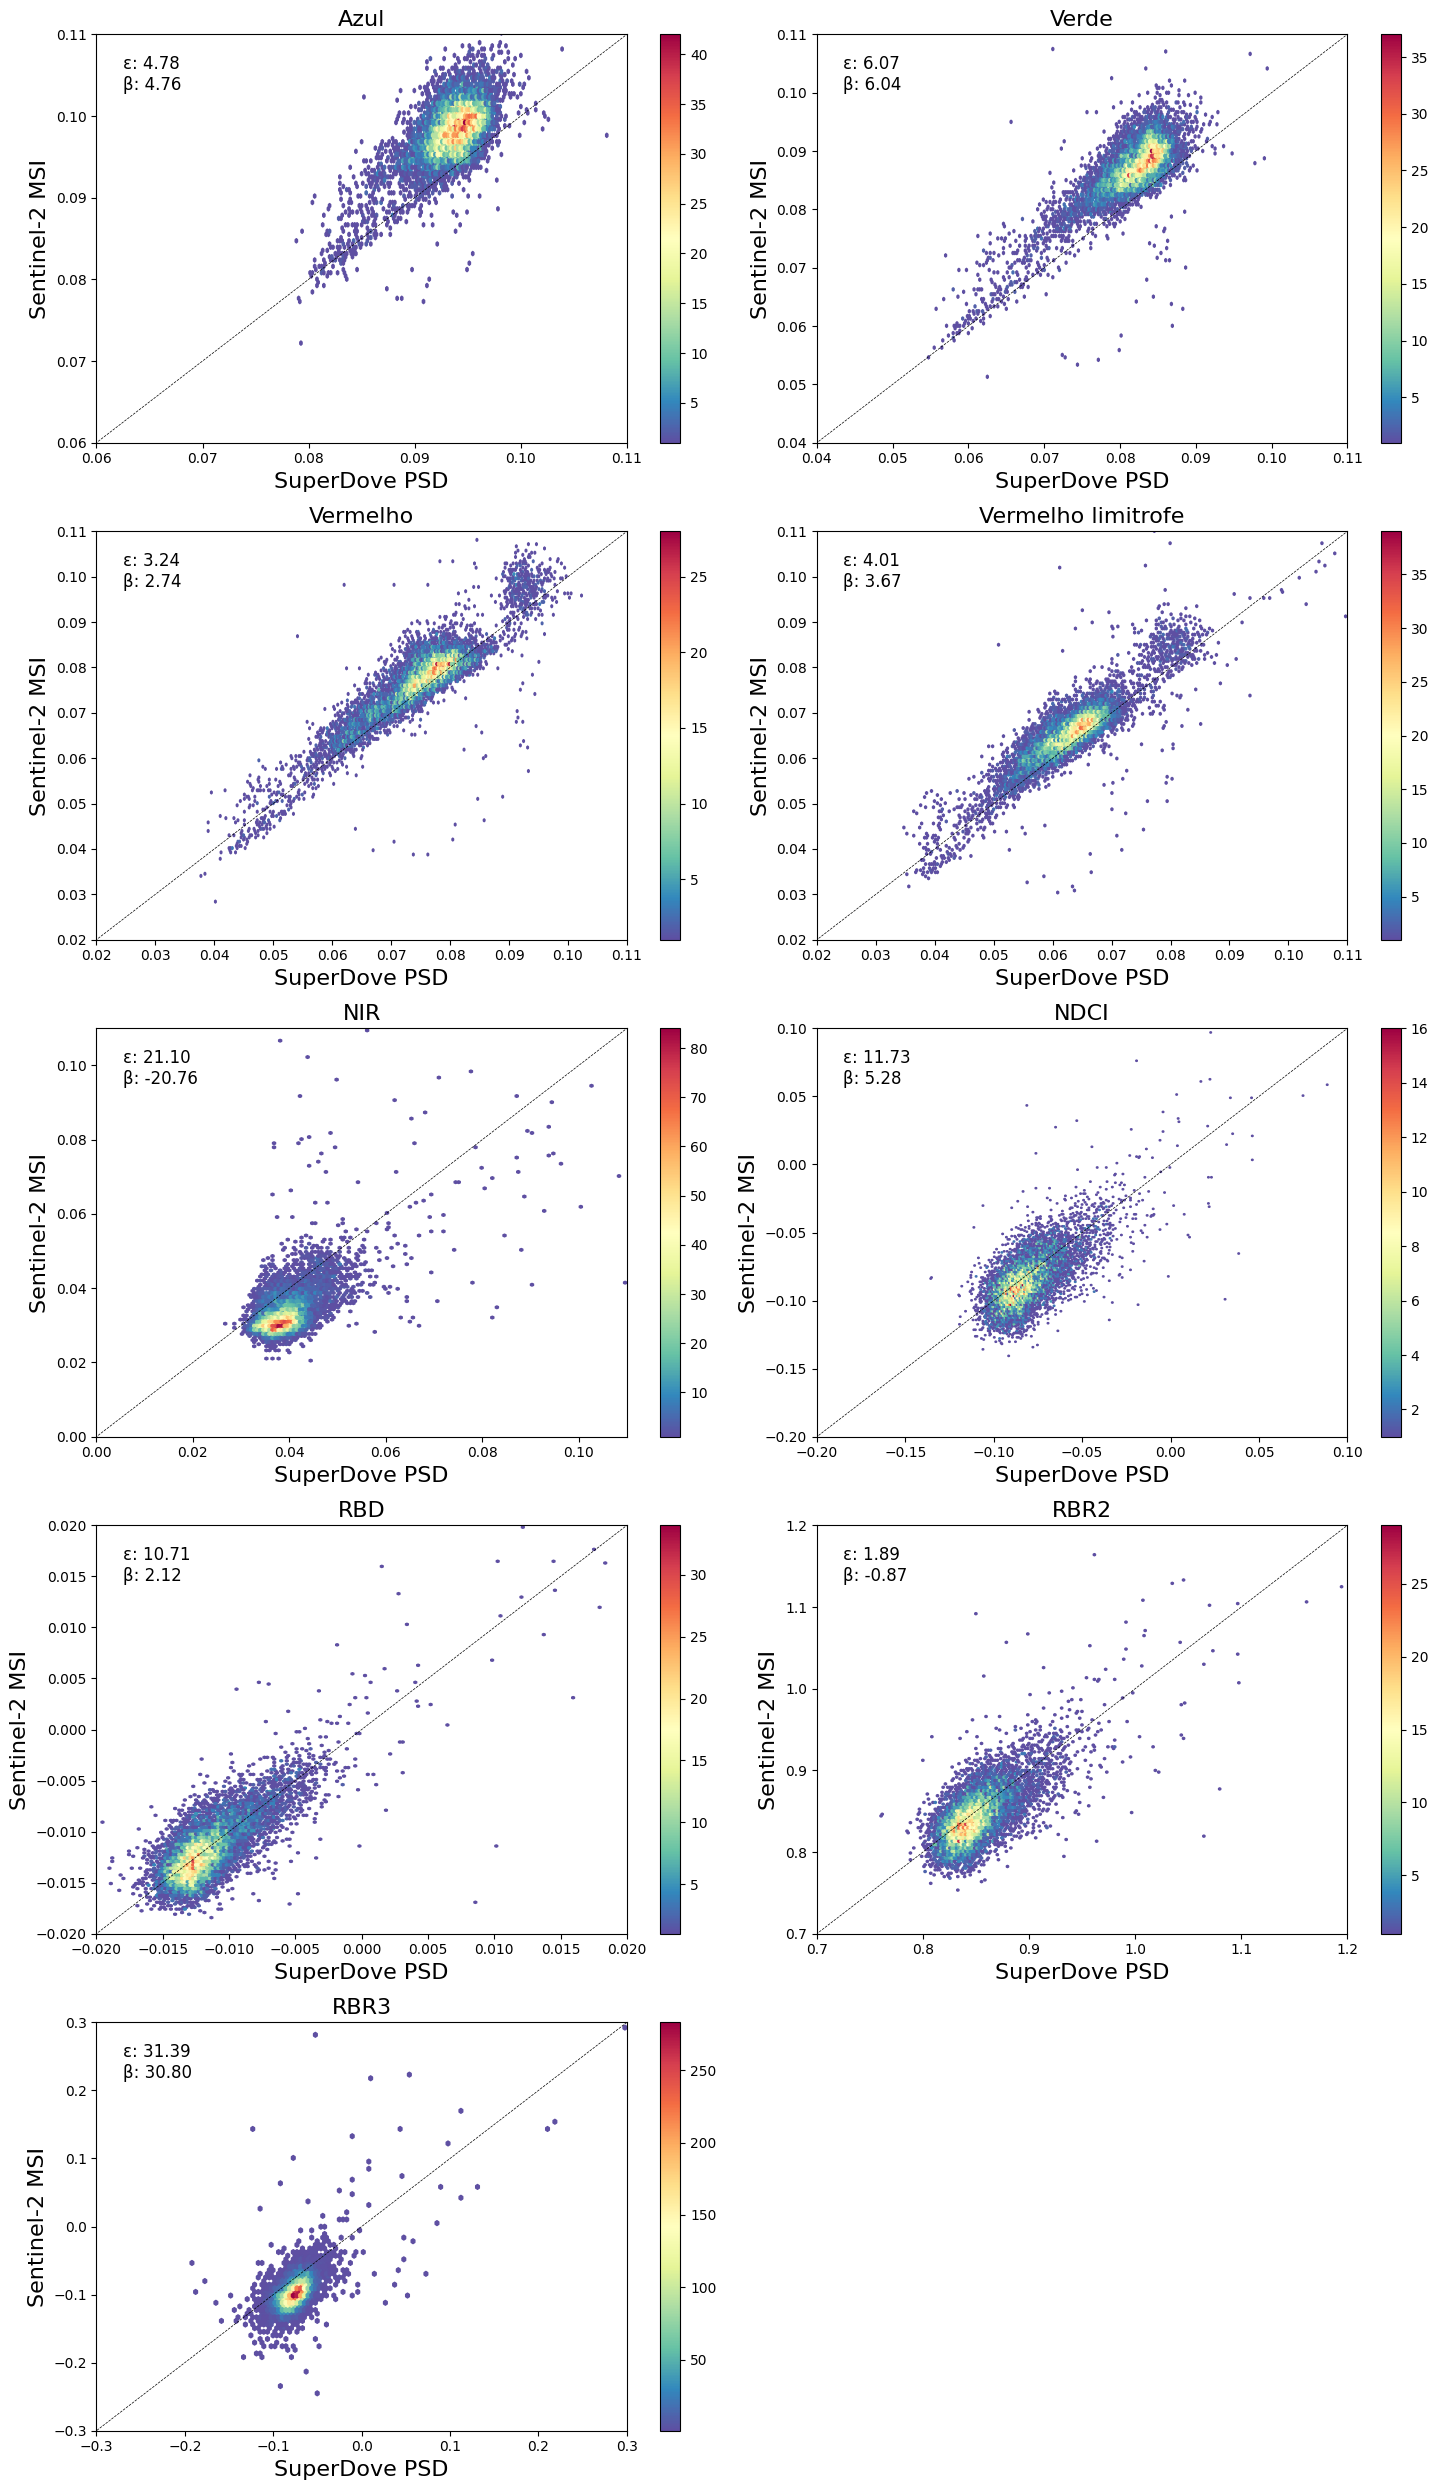

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Defina seus dados ou carregue de um arquivo, assumindo df como DataFrame
# df = pd.read_csv('seu_arquivo.csv') # ou qualquer método de carregamento de dados

# Define os dados para os gráficos
data = {
    'Azul': ('PSD_2', 'S2_B2_1'),
    'Verde': ('PSD_4', 'S2_B3_1'),
    'Vermelho': ('PSD_6', 'S2_B4_1'),
    'Vermelho limitrofe': ('PSD_7', 'S2_B5_1'),
    'NIR': ('PSD_8', 'S2_B8A_1'),
    'NDCI': ('NDCI_s2','NDCI_psd'),
    'RBD': ('RBD_s2', 'RBD_psd'),
    'RBR2': ('RBR2_s2','RBR2_psd'),
    'RBR3': ( 'RBR3_s2', 'RBR3_psd')
}

# Define os limites para cada gráfico
limits = {
    'Azul': {'xlim': (0.06, 0.11), 'ylim': (0.06, 0.11)},
    'Verde': {'xlim': (0.04, 0.11), 'ylim': (0.04, 0.11)},
    'Vermelho': {'xlim': (0.02, 0.11), 'ylim': (0.02, 0.11)},
    'Vermelho limitrofe': {'xlim': (0.02, 0.11), 'ylim': (0.02, 0.11)},
    'NIR': {'xlim': (0.0, 0.11), 'ylim': (0.0, 0.11)},
    'NDCI': {'xlim': (-0.2, 0.1), 'ylim': (-0.2, 0.1)},
    'RBD': {'xlim': (-0.02, 0.02), 'ylim': (-0.02, 0.02)},
    'RBR2': {'xlim': (0.7, 1.2), 'ylim': (0.7, 1.2)},
    'RBR3': {'xlim': (-0.3, 0.3), 'ylim': (-0.3, 0.3)}
}

def error_func(est, med):
    mask = (est != 0) & (med != 0) & (~np.isnan(est)) & (~np.isnan(med))  # Avoid division by zero and NaNs
    est = est[mask]
    med = med[mask]
    if len(est) == 0 or len(med) == 0:  # Check if filtered data is empty
        return np.nan
    y = np.log10(est / med)
    error2 = 100 * (10**(np.nanmedian(np.abs(y))) - 1)
    return error2

def bias_func(est, med):
    mask = (est != 0) & (med != 0) & (~np.isnan(est)) & (~np.isnan(med))  # Avoid division by zero and NaNs
    est = est[mask]
    med = med[mask]
    if len(est) == 0 or len(med) == 0:  # Check if filtered data is empty
        return np.nan
    y = np.log10(est / med)
    bias2 = 100 * np.sign(np.nanmedian(y)) * (10 ** (np.abs(np.nanmedian(y))) - 1)
    return bias2

# Calcula o viés e o MAE para cada par de variáveis
bias_values = {}
error_values = {}
for title, (x_col, y_col) in data.items():
    bias_values[title] = bias_func(df[y_col], df[x_col])
    error_values[title] = error_func(df[y_col], df[x_col])

# Configura a figura e os eixos dinamicamente
num_plots = len(data)
num_cols = 2
num_rows = -(-num_plots // num_cols)  # Arredondamento para cima da divisão

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

fontsize = 16

# Plota cada gráfico
for (title, (x_col, y_col)), ax in zip(data.items(), axs.flatten()):
    hb = ax.hexbin(df[x_col], df[y_col], gridsize=500, cmap='Spectral_r', mincnt=1)
    ax.plot([-1, 2], [-1, 2], color='black', linestyle='--', linewidth=0.5)
    ax.set_xlabel('SuperDove PSD', fontsize=fontsize)
    ax.set_ylabel('Sentinel-2 MSI', fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)

    # Ajusta os limites dos eixos se definidos
    if title in limits:
        ax.set_xlim(limits[title]['xlim'])
        ax.set_ylim(limits[title]['ylim'])

    plt.colorbar(hb, ax=ax)

    # Adiciona anotações de viés e MAE
    ax.annotate(f'ε: {error_values[title]:.2f}\nβ: {bias_values[title]:.2f}',
                xy=(0.05, 0.95), xycoords='axes fraction',
                horizontalalignment='left',
                verticalalignment='top',
                fontsize=12, color='black',
                transform=ax.transAxes
                )

# Remove subplots não utilizados
for ax in axs.flatten()[len(data):]:
    ax.remove()

plt.tight_layout()  # Ajusta o layout para evitar sobreposições
plt.show()
